In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns


# To ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
#import the dataset from the location
#It is the best practice to copy and preform data preprocessing on that data
df=pd.read_csv('test.csv')
df_Test=df.copy(deep= True)

In [3]:
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df_Test['Age'].fillna(df_Test['Age'].median(),inplace = True)

In [6]:
df_Test.Cabin.fillna('Missing', inplace=True)

In [7]:
df_Test['Cabin'] = df_Test['Cabin'].astype(str).str[0]
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,M,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,M,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,M,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,M,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,M,S


In [8]:
df_Test['Cabin'].unique()

array(['M', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [9]:
df_Test1={'A':1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F':6,'G':7,'M':8,'T':9}
df_Test['Cabin']=df_Test['Cabin'].map(df_Test1)

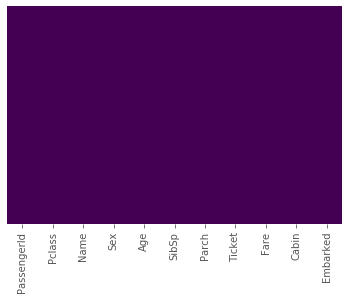

In [10]:
sns.heatmap(df_Test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df_Test['Fare'].fillna(df_Test['Fare'].median(),inplace = True)

In [12]:
df_Test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,8,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,8,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,8,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,8,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,8,S


In [14]:
# list of numerical variables
numerical_features = [variables for variables in df_Test.columns if df_Test[variables].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_Test[numerical_features].head()

Number of numerical variables:  7


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin
0,892,3,34.5,0,0,7.8292,8
1,893,3,47.0,1,0,7.0000,8
2,894,2,62.0,0,0,9.6875,8
3,895,3,27.0,0,0,8.6625,8
4,896,3,22.0,1,1,12.2875,8


In [15]:
#Creating the new variables
for variables in numerical_features:
     #FamilySize of the people combining the Sibsp and parch
    df_Test['FamilySize'] = df_Test ['SibSp'] + df_Test['Parch'] + 1
    #Alone variable(single person boarded into the ship)
    df_Test['IsAlone'] = 1 #initialize to yes/1 is alone
    df_Test['IsAlone'].loc[df_Test['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1


In [16]:
df_Test['Name'] = df_Test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [17]:
df_Test['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [18]:
df_Test['Name'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Name, dtype: int64

In [19]:
df_Test=df_Test.replace(['Rev', 'Dr', 'Ms',
        'Col','Dona'],'people')

In [20]:
df_Test['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'people'], dtype=object)

In [21]:
df_Test2={'Mr':1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'people':5}
df_Test['Name']=df_Test['Name'].map(df_Test2)

In [22]:
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,1,male,34.5,0,0,330911,7.8292,8,Q,1,1
1,893,3,2,female,47.0,1,0,363272,7.0000,8,S,2,0
2,894,2,1,male,62.0,0,0,240276,9.6875,8,Q,1,1
3,895,3,1,male,27.0,0,0,315154,8.6625,8,S,1,1
4,896,3,2,female,22.0,1,1,3101298,12.2875,8,S,3,0


In [23]:
df_Test['Age_group']=0
#less than 16 age are group as 0
df_Test.loc[df_Test['Age']<=15,'Age_group']=0
#Greater than 16 and less than or equalto 32 are grouped as 1
df_Test.loc[(df_Test['Age']>15)&(df_Test['Age']<=20),'Age_group']=1
#Greater than 32 and less than or equalto 48 are grouped as 2
df_Test.loc[(df_Test['Age']>20)&(df_Test['Age']<=26),'Age_group']=2
#Greater than 48 and less than or equalto 64 are grouped as 3
df_Test.loc[(df_Test['Age']>26)&(df_Test['Age']<=32),'Age_group']=3
#Greater than 64 are grouped as 4
df_Test.loc[(df_Test['Age']>32)&(df_Test['Age']<=38),'Age_group']=4
df_Test.loc[(df_Test['Age']>38)&(df_Test['Age']<=45),'Age_group']=5
df_Test.loc[df_Test['Age']>45,'Age_group']=6

In [24]:
df_Test['Age_group'].value_counts().to_frame()

,Age_group
3,144
2,85
6,52
5,37
1,37
0,32
4,31


In [25]:
df_Test['Fare_Range']=pd.qcut(df_Test['Fare'],4)

In [26]:
df_Test['Fare_Range']=0
df_Test.loc[df_Test['Fare']<=7.91,'Fare_Range']=0
df_Test.loc[(df_Test['Fare']>7.91)&(df_Test['Fare']<=14.454),'Fare_Range']=1
df_Test.loc[(df_Test['Fare']>14.454)&(df_Test['Fare']<=31),'Fare_Range']=2
df_Test.loc[(df_Test['Fare']>31)&(df_Test['Fare']<=513),'Fare_Range']=3

In [27]:
df_Test['Fare_Range'].value_counts().to_frame()

,Fare_Range
0,114
3,108
2,103
1,93


In [28]:
#Categorical features
## First lets handle Categorical features which are missing
Categorical_features = [variables for variables in df_Test.columns if df_Test[variables].dtypes =='O']
print('Number of Categorical variables: ', len(Categorical_features))

# visualise the Categorical variables
df_Test[Categorical_features].head()

Number of Categorical variables:  3


,Sex,Ticket,Embarked
0,male,330911,Q
1,female,363272,S
2,male,240276,Q
3,male,315154,S
4,female,3101298,S


In [29]:
Categorical_features = [variables for variables in df_Test.columns if df_Test[variables].dtypes =='O']
print('Number of Categorical variables: ', len(Categorical_features))

# visualise the Categorical variables
Categorical_features=df_Test[Categorical_features].drop(['Ticket'],axis=1)

Number of Categorical variables:  3


In [30]:
from sklearn.preprocessing import LabelEncoder
for variables in Categorical_features:
    le=LabelEncoder()
    df_Test[variables]=le.fit_transform(df_Test[variables].astype(str))

In [31]:
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_group,Fare_Range
0,892,3,1,1,34.5,0,0,330911,7.8292,8,1,1,1,4,0
1,893,3,2,0,47.0,1,0,363272,7.0000,8,2,2,0,6,0
2,894,2,1,1,62.0,0,0,240276,9.6875,8,1,1,1,6,1
3,895,3,1,1,27.0,0,0,315154,8.6625,8,2,1,1,3,1
4,896,3,2,0,22.0,1,1,3101298,12.2875,8,2,3,0,2,1


In [32]:
df_Test.drop(['Age','Ticket','Fare'],axis=1,inplace=True)

In [33]:
df_Test.to_csv('df_test.csv',index=False)